In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys
sys.path.append('../modeling')
from config import TRACKING_URI
import mlflow

# set the experiment id
mlflow.set_tracking_uri(TRACKING_URI)
mlflow.set_experiment(experiment_name='model_simple')
mlflow.autolog()

2025/06/03 14:14:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [3]:
df = pd.read_csv('../data/synth_combined.csv', index_col=0)
col_target = 'dropped_out'
X = df.drop(col_target, axis=1)
# MLFlow doesn't like a series for the target, so convert it to numpy - for sklearn it doesn't matter
y = df[col_target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [4]:
encoder = OneHotEncoder(drop='first')
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.fit_transform(X_test)

In [5]:
def check(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the performance of a given model on training and testing datasets.

    The function performs the following steps:
    1. Predicts the target variable for both training and testing datasets.
    2. Displays confusion matrices for both datasets using `ConfusionMatrixDisplay`.
    3. Generates and displays classification reports for both datasets.

    Args:
        model: The trained machine learning model to evaluate.
        train_x: Training features
        test_x: Testing features
        train_y: Training target
        test_y: Testing target

    Visualization:
        - The function creates a 2x2 grid of subplots:
            - Top row: Confusion matrices for test and train datasets.
            - Bottom row: Classification reports for test and train datasets.

    Returns:
        None: The function directly displays the evaluation results.
    """

    test_pred_y = model.predict(X_test)
    train_pred_y = model.predict(X_train)

    classes = ['Terminated', 'Fulfilled']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4), gridspec_kw={'height_ratios': [3, 1]})

    cmd_test = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=classes, cmap=plt.cm.Blues, ax=axes[0][0])
    axes[0][0].set_title('Test Data')
    axes[1][0].text(0, 0, classification_report(y_test, test_pred_y, target_names=classes), verticalalignment='top', fontfamily='monospace')
    axes[1][0].axis('off')

    cmd_test = ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, display_labels=classes, cmap=plt.cm.Greens, ax=axes[0][1])
    axes[0][1].set_title('Train Data')
    axes[1][1].text(0, 0, classification_report(y_train, train_pred_y, target_names=classes), verticalalignment='top', fontfamily='monospace')
    axes[1][1].axis('off')


2025/06/03 14:14:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd57ba09afb084d0f8a0c7ddb43690547', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run delightful-seal-104 at: http://mlflow.fa.berufsnavigator.de/#/experiments/429379183992082117/runs/d57ba09afb084d0f8a0c7ddb43690547
🧪 View experiment at: http://mlflow.fa.berufsnavigator.de/#/experiments/429379183992082117


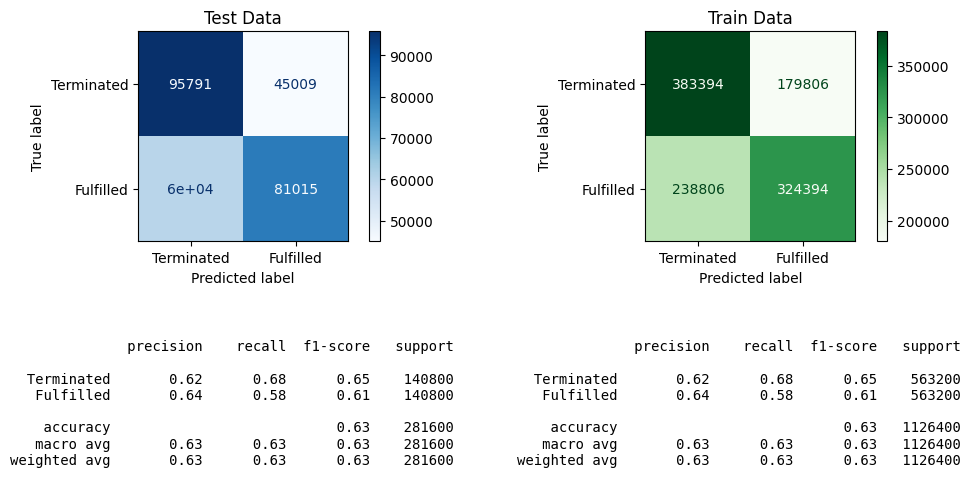

In [6]:
model = LogisticRegression()
model.fit(X_train_enc, y_train)

check(model, X_train_enc, X_test_enc, y_train, y_test)
